<a href="https://colab.research.google.com/github/MpRonald/Deep-Learning/blob/main/Deep_Learning_Introduction_Tensors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning Introduction

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# loading dataset MNIST
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
train_images[1]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [5]:
test_images.shape

(10000, 28, 28)

In [6]:
test_images[1]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 116, 125, 171,
        255, 255, 150,  93,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 169, 253, 253, 253,
        253, 253, 253, 218,  30,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 169, 253, 253, 253, 213,
        142, 176, 253, 253, 122,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

### The workflow will be as follows: First, we’ll feed the neural network the training data, train_images and train_labels. The network will then learn to associate images and labels. Finally, we’ll ask the network to produce predictions for test_images, and we’ll verify whether these predictions match the labels from test_labels.

In [7]:
# build a network
from tensorflow import keras 
from tensorflow.keras import layers
model = keras.Sequential([layers.Dense(512, activation="relu"),
                          layers.Dense(10, activation="softmax")])

### Here, our model consists of a sequence of two Dense layers, which are densely connected (also called fully connected) neural layers. The second (and last) layer is a 10-way softmax classification layer, which means it will return an array of 10 probability scores (summing to 1). Each score will be the probability that the current digit image belongs to one of our 10 digit classes.

* An optimizer—The mechanism through which the model will update itself based on the training data it sees, so as to improve its performance.

* A loss function—How the model will be able to measure its performance on the training data, and thus how it will be able to steer itself in the right direction.

* Metrics to monitor during training and testing—Here, we’ll only care about accuracy (the fraction of the images that were correctly classified).

In [8]:
# The compilation step
model.compile(optimizer="rmsprop", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

### Before training, we’ll preprocess the data by reshaping it into the shape the model expects and scaling it so that all values are in the [0, 1] interval. Previously, our training images were stored in an array of shape (60000, 28, 28) of type uint8 with values in the [0, 255] interval. We’ll transform it into a float32 array of shape (60000, 28 * 28) with values between 0 and 1.

In [9]:
# Preparing the image data
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255 
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

In [10]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 8s 13ms/step - loss: 0.2565 - accuracy: 0.9262
Epoch 2/5
469/469 [==============================] - 7s 14ms/step - loss: 0.1029 - accuracy: 0.9695
Epoch 3/5
469/469 [==============================] - 7s 14ms/step - loss: 0.0675 - accuracy: 0.9798
Epoch 4/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0488 - accuracy: 0.9851
Epoch 5/5
469/469 [==============================] - 6s 12ms/step - loss: 0.0361 - accuracy: 0.9895


In [11]:
# Using the model to make predictions
test_digits = test_images[0:10]
predictions = model.predict(test_digits)
predictions[0]

array([2.6519238e-08, 6.7339601e-10, 1.1894500e-05, 1.2698821e-04,
       1.0474646e-11, 4.0482004e-08, 3.0953870e-14, 9.9985802e-01,
       4.8758329e-07, 2.5651684e-06], dtype=float32)

### Each number of index i in that array corresponds to the probability that digit image test_digits[0] belongs to class i.

This first test digit has the highest probability score (0.99999106, almost 1) at index 7, so according to our model, it must be a 7:

In [12]:
predictions[0].argmax()

7

In [13]:
predictions[0][7] 

0.999858

In [14]:
test_labels[0]

7

In [15]:
predictions[2].argmax()

1

In [16]:
predictions[0][7] 

0.999858

In [17]:
test_labels[2]

1

In [18]:
# Evaluating the model on new data
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")

313/313 [==============================] - 1s 4ms/step - loss: 0.0608 - accuracy: 0.9809
test_acc: 0.98089998960495


#### The test-set accuracy turns out to be 97.8%—that’s quite a bit lower than the training-set accuracy (98.9%). 

In [19]:
# check the dimensions
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images.ndim 

3

In [20]:
train_images.dtype

dtype('uint8')

#### So what we have here is a rank-3 tensor of 8-bit integers. More precisely, it’s an array of 60,000 matrices of 28 × 28 integers. Each such matrix is a grayscale image, with coefficients between 0 and 255.

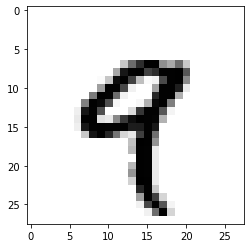

In [21]:
# Displaying the fourth digit
import matplotlib.pyplot as plt
digit = train_images[4]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [22]:
# Naturally, the corresponding label is the integer 9:
train_labels[4] 

9

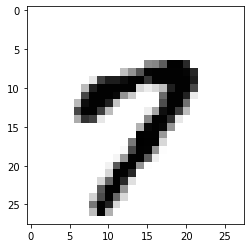

In [23]:
digit = train_images[15]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [24]:
train_labels[15]

7

# Manipulating tensors in NumPy

In [25]:
# The following example selects digits 
#10 to #100 (#100 isn’t included) and puts them in an array of shape (90, 28, 28):
my_slice = train_images[10:100]
my_slice.shape

(90, 28, 28)

#### It’s equivalent to this more detailed notation, which specifies a start index and stop index for the slice along each tensor axis. Note that : is equivalent to selecting the entire axis:

In [26]:
my_slice = train_images[10:100, :, :] # the same this example [10:100, 0:28, 0:28]
my_slice.shape

(90, 28, 28)

In [27]:
my_slice = train_images[10:100, 0:28, 0:28]
my_slice.shape

(90, 28, 28)

### In general, you may select slices between any two indices along each tensor axis. For instance, in order to select 14 × 14 pixels in the bottom-right corner of all images, you would do this:

In [28]:
my_slice = train_images[:, 14:, 14:]
my_slice

array([[[240, 253, 253, ...,   0,   0,   0],
        [ 45, 186, 253, ...,   0,   0,   0],
        [  0,  16,  93, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]],

       [[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]],

       [[241, 243, 234, ...,   0,   0,   0],
        [143,  91,  28, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]],

       ...,

       [[253, 254, 253, ...,   0,   0,   0],
        [ 72, 192, 254, ...,   0,   0,   0],
        [  0,   6, 242, ...,   0,   0,   0

In [29]:
my_slice = train_images[:, 7:-7, 7:-7]
my_slice

array([[[ 49, 238, 253, ...,  93,  82,  82],
        [ 18, 219, 253, ...,   0,   0,   0],
        [  0,  80, 156, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ..., 253, 207,   2],
        [  0,   0,   0, ..., 250, 182,   0],
        [  0,   0,   0, ...,  78,   0,   0]],

       [[  0,   0,   0, ...,  84, 252, 253],
        [  0,   0,   0, ...,  96, 189, 253],
        [  0,   0,   0, ...,  47,  79, 255],
        ...,
        [252, 145,   0, ..., 252, 173,   0],
        [253, 225,   0, ..., 162,   0,   0],
        [252, 249, 146, ...,  56,   0,   0]],

       [[  0,   0,   0, ...,   0,   2, 153],
        [  0,   0,   0, ...,   0,  27, 254],
        [  0,   0,   0, ...,   0, 183, 254],
        ...,
        [  0,   0,   0, ..., 254,  57,   0],
        [  0,   0,   0, ..., 254,  57,   0],
        [  0,   0,   0, ..., 255,  94,   0]],

       ...,

       [[  0,   0,   0, ..., 223, 159, 131],
        [  0,   0,   0, ...,  27,   0,   0],
        [  0,   0,  54, ...,   0,   0,   0

# The notion of data batches

### In addition, deep learning models don’t process an entire dataset at once; rather, they break the data into small batches. Concretely, here’s one batch of our MNIST digits, with a batch size of 128:



In [30]:
batch = train_images[:128]
batch

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [31]:
# And here’s the next batch:
batch = train_images[128:256]
batch

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [32]:
# And the nth batch:
n = 3 
batch = train_images[128 * n:128 * (n + 1)]
batch

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

# The gears of neural networks: Tensor operations
### Much as any computer program can be ultimately reduced to a small set of binary operations on binary inputs (AND, OR, NOR, and so on), all transformations learned by deep neural networks can be reduced to a handful of tensor operations (or tensor functions) applied to tensors of numeric data. For instance, it’s possible to add tensors, multiply tensors, and so on.

### In our initial example, we built our model by stacking Dense layers on top of each other. A Keras layer instance looks like this:

In [33]:
keras.layers.Dense(512, activation="relu")

### This layer can be interpreted as a function, which takes as input a matrix and returns another matrix—a new representation for the input tensor. Specifically, the function is as follows (where W is a matrix and b is a vector, both attributes of the layer):

###The "relu" operation and addition are element-wise operations: operations that are applied independently to each entry in the tensors being considered. This means these operations are highly amenable to massively parallel implementations (vectorized implementations, a term that comes from the vector processor supercomputer architecture from the 1970–90 period). If you want to write a naive Python implementation of an element-wise operation, you use a for loop, as in this naive implementation of an element-wise relu operation:

In [34]:
def naive_relu(x):
    assert len(x.shape) == 2 # x is a rank-2 NumPy tensor.      
    x = x.copy() # Avoid overwriting the input tensor.                  
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] = max(x[i, j], 0)
    return x

In [35]:
def naive_add(x, y):
    assert len(x.shape) == 2       
    assert x.shape == y.shape
    x = x.copy()                   
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[i, j]
    return x

In [36]:
# Let’s actually time the difference:

import time
import numpy as np

x = np.random.random((20, 100))
y = np.random.random((20, 100))
  
t0 = time.time() 
for _ in range(1000):
    z = x + y
    z = np.maximum(z, 0.) 
print("Took: {0:.2f} s".format(time.time() - t0))

Took: 0.01 s


In [37]:
t0 = time.time() 
for _ in range(1000):
    z = naive_add(x, y)
    z = naive_relu(z) 
print("Took: {0:.2f} s".format(time.time() - t0))

Took: 4.30 s


### In terms of implementation, no new rank-2 tensor is created, because that would be terribly inefficient. The repetition operation is entirely virtual: it happens at the algorithmic level rather than at the memory level. But thinking of the vector being repeated 10 times alongside a new axis is a helpful mental model. Here’s what a naive implementation would look like:

In [38]:
def naive_add_matrix_and_vector(x, y):
    assert len(x.shape) == 2 # x is a rank-2 NumPy tensor.
    assert len(y.shape) == 1 # y is a NumPy vector.
    assert x.shape[1] == y.shape[0]
    x = x.copy() # Avoid overwriting the input tensor.
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[j]
    return x

# Tensor product
### The tensor product, or dot product (not to be confused with an element-wise product, the * operator), is one of the most common, most useful tensor operations.

### In NumPy, a tensor product is done using the np.dot function (because the mathematical notation for tensor product is usually a dot):

In [39]:
x = np.random.random((32,))
y = np.random.random((32,))
z = np.dot(x, y)

In [40]:
z

8.887144913697249

In [41]:
z = x * y

In [42]:
# Mathematically, what does the dot operation do? Let’s start with the dot 
# product of two vectors, x and y. It’s computed as follows:

def naive_vector_dot(x, y):
    assert len(x.shape) == 1 # x and y are NumPy vectors.
    assert len(y.shape) == 1 # x and y are NumPy vectors.
    assert x.shape[0] == y.shape[0]
    z = 0. 
    for i in range(x.shape[0]):
        z += x[i] * y[i]
    return z

### You can also take the dot product between a matrix x and a vector y, which returns a vector where the coefficients are the dot products between y and the rows of x. You implement it as follows:

In [43]:
def naive_matrix_vector_dot(x, y):
    assert len(x.shape) == 2 # x is a NumPy matrix.
    assert len(y.shape) == 1 # y is a NumPy vector.
    assert x.shape[1] == y.shape[0] # The first dimension of x must be the same as the 0th dimension of y!
    z = np.zeros(x.shape[0]) # This operation returns a vector of 0s with the same shape as y.
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            z[i] += x[i, j] * y[j]
    return z

In [44]:
# You could also reuse the code we wrote previously, which highlights 
# the relationship between a matrix-vector product and a vector product:

def naive_matrix_vector_dot(x, y):
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        z[i] = naive_vector_dot(x[i, :], y)
    return z

In [45]:
def naive_matrix_dot(x, y):
    assert len(x.shape) == 2 # x and y are NumPy matrices.
    assert len(y.shape) == 2 # x and y are NumPy matrices.
    assert x.shape[1] == y.shape[0] # The first dimension of x must be the same as the 0th dimension of y!
    z = np.zeros((x.shape[0], y.shape[1])) # This operation returns a matrix of 0s with a specific shape.
    for i in range(x.shape[0]): # Iterates over the rows of x . . .
        for j in range(y.shape[1]): # . . . and over the columns of y.
            row_x = x[i, :]
            column_y = y[:, j]
            z[i, j] = naive_vector_dot(row_x, column_y)
    return z

# Tensor reshaping
### A third type of tensor operation that’s essential to understand is tensor reshaping. Although it wasn’t used in the Dense layers in our first neural network example, we used it when we preprocessed the digits data before feeding it into our model:

In [46]:
train_images = train_images.reshape((60000, 28 * 28))
x = np.array([[0., 1.], [2., 3.], [4., 5.]])
x

array([[0., 1.],
       [2., 3.],
       [4., 5.]])

In [47]:
x.shape

(3, 2)

In [48]:
# reshaping
x = x.reshape((6, 1))
x

array([[0.],
       [1.],
       [2.],
       [3.],
       [4.],
       [5.]])

In [49]:
x = np.zeros((300, 20))
x.shape

(300, 20)

In [50]:
# transpose with numpy
x = np.transpose(x)
x.shape

(20, 300)

In [51]:
import pandas as pd

In [52]:
x = np.zeros((300, 20))
x.shape

(300, 20)

In [53]:
# transpose with pandas
x = x.T
x.shape

(20, 300)

# Geometric interpretation of tensor operations
### Because the contents of the tensors manipulated by tensor operations can be interpreted as coordinates of points in some geometric space, all tensor operations have a geometric interpretation. For instance, let’s consider addition. We’ll start with the following vector:

In [54]:
A = [0.5, 1]

In [55]:
B = [1, 0.25]

In [56]:
AB = [0.5,1,1,0.25]

# THE GRADIENT TAPE IN TENSORFLOW

### The API through which you can leverage TensorFlow’s powerful automatic differentiation capabilities is the GradientTape. It’s a Python scope that will “record” the tensor operations that run inside it, in the form of a computation graph (sometimes called a “tape”). This graph can then be used to retrieve the gradient of any output with respect to any variable or set of variables (instances of the tf.Variable class). A tf.Variable is a specific kind of tensor meant to hold mutable state—for instance, the weights of a neural network are always tf.Variable instances.

In [57]:
import tensorflow as tf
x = tf.Variable(0.) # Instantiate a scalar Variable with an initial value of 0.  
with tf.GradientTape() as tape: # Open a GradientTape scope.
    y = 2 * x + 3 # Inside the scope, apply some tensor operations to our variable.                    
grad_of_y_wrt_x = tape.gradient(y, x) # Use the tape to retrieve the gradient of the output y with respect to our variable x.

In [58]:
# The GradientTape works with tensor operations:
x = tf.Variable(tf.random.uniform((2, 2)))
with tf.GradientTape() as tape:
    # Instantiate a Variable with shape (2, 2) and an initial value of all zeros.
    y = 2 * x + 3 
    # grad_of_y_wrt_x is a tensor of shape (2, 2) (like x) describing 
    # the curvature of y = 2 * a + 3 around x = [[0, 0], [0, 0]].
    grad_of_y_wrt_x = tape.gradient(y, x)

In [59]:
# It also works with lists of variables:

W = tf.Variable(tf.random.uniform((2, 2)))
b = tf.Variable(tf.zeros((2,)))
x = tf.random.uniform((2, 2)) 
with tf.GradientTape() as tape:
    y = tf.matmul(x, W) + b # matmul is how you say “dot product” in TensorFlow.
grad_of_y_wrt_W_and_b = tape.gradient(y, [W, b])
# grad_of_y_wrt_W_and_b is a list of two tensors with the same shapes as W and b, respectively.

# Looking back at our first example
###You’re nearing the end of this chapter, and you should now have a general understanding of what’s going on behind the scenes in a neural network. What was a magical black box at the start of the chapter has turned into a clearer picture, as illustrated in figure 2.26: the model, composed of layers that are chained together, maps the input data to predictions. The loss function then compares these predictions to the targets, producing a loss value: a measure of how well the model’s predictions match what was expected. The optimizer uses this loss value to update the model’s weights.

In [60]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255 
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

In [61]:
model = keras.Sequential([ layers.Dense(512, activation="relu"), 
                          layers.Dense(10, activation="softmax")])

In [62]:
# This was the model-compilation step:

model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [63]:
# this was the training loop:

model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 7s 13ms/step - loss: 0.2516 - accuracy: 0.9263
Epoch 2/5
469/469 [==============================] - 5s 10ms/step - loss: 0.1030 - accuracy: 0.9695
Epoch 3/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0671 - accuracy: 0.9797
Epoch 4/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0488 - accuracy: 0.9849
Epoch 5/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0364 - accuracy: 0.9889


In [69]:
import tensorflow as tf
  
class NaiveDense:
    def __init__(self, input_size, output_size, activation):
        self.activation = activation
 
        w_shape = (input_size, output_size)
        # Create a matrix, W, of shape (input_size, output_size), initialized with random values.
        w_initial_value = tf.random.uniform(w_shape, minval=0, maxval=1e-1)
        self.W = tf.Variable(w_initial_value)
  
        b_shape = (output_size)                                           
        b_initial_value = tf.zeros(b_shape)
        self.b = tf.Variable(b_initial_value)
        # Create a vector, b, of shape (output_size,), initialized with zeros.
  
    def __call__(self, inputs): # Apply the forward pass.
        return self.activation(tf.matmul(inputs, self.W) + self.b)
  
    @property
    def weights(self): # Convenience method for retrieving the layer’s weights
        return [self.W, self.b]

In [70]:
class NaiveSequential:
    def __init__(self, layers):
        self.layers = layers
  
    def __call__(self, inputs):
        x = inputs
        for layer in self.layers:
           x = layer(x)
        return x
  
    @property 
    def weights(self):
       weights = []
       for layer in self.layers:
           weights += layer.weights
       return weights

In [73]:
model = NaiveSequential([
    NaiveDense(input_size=28 * 28, output_size=512, activation=tf.nn.relu),
    NaiveDense(input_size=512, output_size=10, activation=tf.nn.softmax)]) 
assert len(model.weights) == 4 

In [74]:
# A BATCH GENERATOR

# Next, we need a way to iterate over the MNIST data in mini-batches. This is easy:

import math
  
class BatchGenerator:
    def __init__(self, images, labels, batch_size=128):
        assert len(images) == len(labels)
        self.index = 0
        self.images = images
        self.labels = labels
        self.batch_size = batch_size
        self.num_batches = math.ceil(len(images) / batch_size)
 
    def next(self):
        images = self.images[self.index : self.index + self.batch_size]
        labels = self.labels[self.index : self.index + self.batch_size]
        self.index += self.batch_size
        return images, labels

In [76]:
def one_training_step(model, images_batch, labels_batch):
    with tf.GradientTape() as tape:
        predictions = model(images_batch)                                   
        per_sample_losses = tf.keras.losses.sparse_categorical_crossentropy(
            labels_batch, predictions)                                      
        average_loss = tf.reduce_mean(per_sample_losses) 
        # Run the “forward pass” (compute the model’s predictions under a GradientTape scope).
    gradients = tape.gradient(average_loss, model.weights)
    """Compute the gradient of the loss with regard to the weights. 
    The output gradients is a list where each entry corresponds 
    to a weight from the model.weights list."""
    update_weights(gradients, model.weights)
    # Update the weights using the gradients (we will define this function shortly).
    return average_loss

In [77]:
learning_rate = 1e-3 
  
def update_weights(gradients, weights):
    for g, w in zip(gradients, weights):
        w.assign_sub(g * learning_rate)
        # assign_sub is the equivalent of -= for TensorFlow variables.

In [78]:
from tensorflow.keras import optimizers
  
optimizer = optimizers.SGD(learning_rate=1e-3)
  
def update_weights(gradients, weights):
    optimizer.apply_gradients(zip(gradients, weights))

# The full training loop
### An epoch of training simply consists of repeating the training step for each batch in the training data, and the full training loop is simply the repetition of one epoch:

In [79]:
def fit(model, images, labels, epochs, batch_size=128):
    for epoch_counter in range(epochs):
        print(f"Epoch {epoch_counter}")
        batch_generator = BatchGenerator(images, labels)
        for batch_counter in range(batch_generator.num_batches):
            images_batch, labels_batch = batch_generator.next()
            loss = one_training_step(model, images_batch, labels_batch)
            if batch_counter % 100 == 0:
                print(f"loss at batch {batch_counter}: {loss:.2f}")

In [80]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
  
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255  
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255 
  
fit(model, train_images, train_labels, epochs=10, batch_size=128)

Epoch 0
loss at batch 0: 5.61
loss at batch 100: 2.22
loss at batch 200: 2.20
loss at batch 300: 2.10
loss at batch 400: 2.22
Epoch 1
loss at batch 0: 1.92
loss at batch 100: 1.87
loss at batch 200: 1.82
loss at batch 300: 1.73
loss at batch 400: 1.83
Epoch 2
loss at batch 0: 1.60
loss at batch 100: 1.57
loss at batch 200: 1.49
loss at batch 300: 1.44
loss at batch 400: 1.51
Epoch 3
loss at batch 0: 1.34
loss at batch 100: 1.34
loss at batch 200: 1.23
loss at batch 300: 1.22
loss at batch 400: 1.28
Epoch 4
loss at batch 0: 1.14
loss at batch 100: 1.15
loss at batch 200: 1.03
loss at batch 300: 1.05
loss at batch 400: 1.11
Epoch 5
loss at batch 0: 0.99
loss at batch 100: 1.01
loss at batch 200: 0.89
loss at batch 300: 0.93
loss at batch 400: 0.99
Epoch 6
loss at batch 0: 0.88
loss at batch 100: 0.91
loss at batch 200: 0.79
loss at batch 300: 0.84
loss at batch 400: 0.90
Epoch 7
loss at batch 0: 0.80
loss at batch 100: 0.82
loss at batch 200: 0.71
loss at batch 300: 0.76
loss at batch 40

In [81]:
# Evaluating the model
predictions = model(test_images)
predictions = predictions.numpy() # Calling .numpy() on a TensorFlow tensor converts it to a NumPy tensor.
predicted_labels = np.argmax(predictions, axis=1)
matches = predicted_labels == test_labels
print(f"accuracy: {matches.mean():.2f}")

accuracy: 0.82
